In [2]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils import area_weighting

In [6]:
# Plot evolution of net flux and temperature to see how long it takes to spin up
def plot_spinup(d, ax, albedo, tau):
    olr_sum = area_weighting(d.olr).sum(dim = ['lon','lat'])
    short_wave_sum = area_weighting(d.swdn_toa).sum(dim = ['lon','lat'])
    # Include surface albedo which reflects all SW radiation reaching it
    # SW radiation reaching it has been reduced by that absorbed in the atmosphere - non zero short wave optical depth.
    # There is no absorption on return trip from surface to space though hence just the one factor.
    net_flux = olr_sum - short_wave_sum*(1-albedo*np.exp(-tau))
    net_flux.plot.line(ax=ax, color='b')
    ax.set_ylabel('TOA Net Outgoing FLux / $Wm^{-2}$\nOLR - (1-$\\alpha e^{-\\tau})SW$', color='b')
    t_surf_mean = area_weighting(d.t_surf).mean(dim = ['lon','lat']) - 273.15  # In Celsius
    ax2 = ax.twinx()
    t_surf_mean.plot.line(ax=ax2, color='r')
    ax2.set_ylabel('Surface Temperature / $°C$', color='r')


In [4]:
# Load dataset across all months for each depth value
depth_values = [1, 5, 10]    # mixed layer depths in meters
exp_names = [f'aquaplanet/spin_up/byrne/d{depth_values[i]}' for i in range(len(depth_values))]
datasets = [isca_tools.load_dataset(exp_name) for exp_name in exp_names]
namelist = isca_tools.load_namelist(exp_names[0])  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']
tau = namelist['two_stream_gray_rad_nml']['atm_abs']


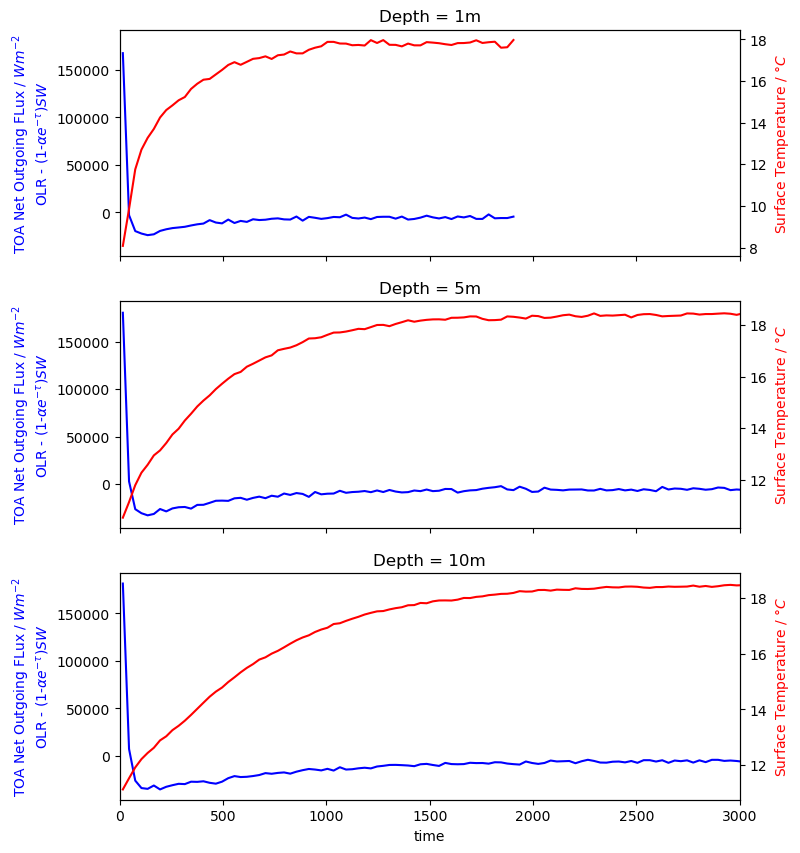

In [7]:
# Plot spinup time for each depth value
fig, axs = plt.subplots(3,1, figsize=(8, 10), sharex=True, sharey=True)
for i in range(len(datasets)):
    plot_spinup(datasets[i], axs[i], albedo, tau)
axs[0].set_xlim([0,3000]);
axs[0].set_xlabel('');
axs[1].set_xlabel('');
for i in range(len(depth_values)):
    axs[i].set_title(f"Depth = {depth_values[i]}m")